# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [33]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


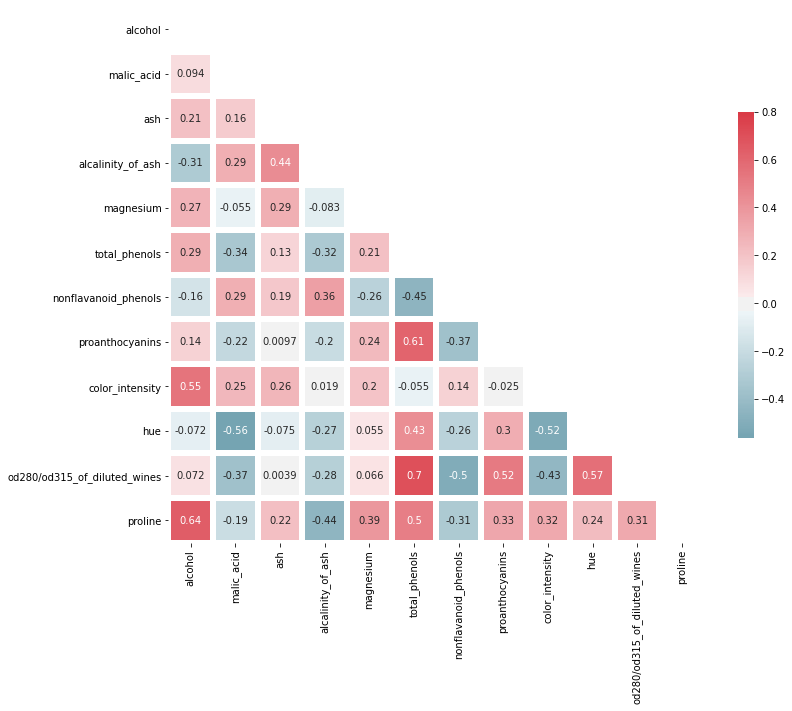

In [40]:
def correlation_matrix(df, drop=None):
    if drop: 
        corr = df.drop(columns=drop).corr().copy()
    else:
        corr = df.corr().copy()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5}, annot=True)
plt.figure(figsize=(12,12))
correlation_matrix(X,drop='flavanoids') # This column has a very high correlation

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [53]:
from sklearn.preprocessing import StandardScaler
X_clean = X.drop(columns='flavanoids').copy()
X_clean_scaled = StandardScaler().fit_transform(X_clean)

In [71]:
from sklearn.cluster import KMeans
labelsn8= KMeans(n_clusters=8).fit(X_clean_scaled).labels_
df = pd.DataFrame(X_clean_scaled)
df['label'] = labelsn8
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,4


In [81]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labelsn8)

0.04363142380625492

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [94]:
labelsn5= KMeans(n_clusters=5).fit(X_clean_scaled).labels_
df = pd.DataFrame(X_clean_scaled)
df['label'] = labelsn8
silhouette_score(X, labelsn5)

0.06155538373170638

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [95]:
labelsn3= KMeans(n_clusters=3).fit(X_clean_scaled).labels_
df = pd.DataFrame(X_clean_scaled)
df['label'] = labelsn8
silhouette_score(X, labelsn3)

0.20419759645172572

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.